
# Pytorch + HuggingFace 
## KoElectra Model
박장원님의 KoElectra-small 사용<br>
https://monologg.kr/2020/05/02/koelectra-part1/<br>
https://github.com/monologg/KoELECTRA

## Dataset
네이버 영화 리뷰 데이터셋<br>
https://github.com/e9t/nsmc

## References
- https://huggingface.co/transformers/training.html
- https://tutorials.pytorch.kr/beginner/data_loading_tutorial.html
- https://tutorials.pytorch.kr/beginner/blitz/cifar10_tutorial.html
- https://wikidocs.net/44249

## 주의사항
꼭 GPU로 해주세요 - 1epoch 당 약 20분 소요

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import re
import urllib.request

In [1]:
# HuggingFace transformers 설치 및 NSMC 데이터셋 다운로드
!pip install transformers
!gdown 1CVJUTAVf4jdvf4NNA_EYrBVVPWVEc2C9

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.4 MB 4.2 MB/s 
     |████████████████████████████████| 596 kB 56.3 MB/s 
     |████████████████████████████████| 6.6 MB 66.6 MB/s 
     |████████████████████████████████| 86 kB 6.4 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
Downloading...
From: https://drive.google.com/uc?id=1CVJUTAVf4jdvf4NNA_EYrBVVPWVEc2C9
To: /content/comment_data_all.csv
100% 48.2M/48.2M [00:00<00:00, 65.6MB/s]


In [3]:
df = pd.read_csv('comment_data_all.csv', index_col=0)
df.drop(['month', 'page'], axis=1, inplace=True)
df

,comment,star
0,휘뚜루마뚜루 입고 다니기 좋습니다 로얄라이프제품들은 다 성공하는 듯!따숩고 예쁘기까...,5
1,어깨 깡패됩니다 기장감이나 털 재질 전체적으로 전부 맘에 들어요,5
2,바지 짱 편합니다ㅎㅎ 색깔도 너무 마음에 들고 핏도 좋네요,5
3,입기 편하고 후드 탈부착 돼서 여러 무드 연출하기도 쉽고 좋은데 가죽냄새랑 마감이 ...,4
4,유니폼 브릿지 발마칸 코트! 세일.기간중 저렴하게 겟겟! 최고 말모말모,5
...,...,...
344135,가방이 아주 포인트 그 자체라서 빤딱하고 너무 좋아요,5
344136,보들보둘하고 사이즈도 괜찮고 색도 이쁘게 잘나왔음,5
344137,생각보다 클 줄 알고 샀다가 조금 작았네요 그래도 좋아요,4
344138,생각보다 색상이 밝고 사이즈는 조금 작게 나온거 같아요.길이는 좀 길지만 수선안하고...,5


In [6]:
pos = df[df['star'] == 5] #298,540
nag = df[df['star'] < 5] #45,600

In [7]:
pos['label'] = 1
nag['label'] = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [15]:
pos = pos.iloc[:45000] # 이 부분만 데이터에 맞게 조정하면 됩니다
nag = nag.iloc[:45000]

In [16]:
pos_train = pos.sample(frac=0.8, random_state=3000)
pos_test = pos.drop(pos_train.index)

In [17]:
nag_train = nag.sample(frac=0.8, random_state=3000)
nag_test = nag.drop(nag_train.index)

In [18]:
train = pd.concat([pos_train, nag_train]).reset_index().drop(['index','star'], axis=1) # 72,000
test = pd.concat([pos_test, nag_test]).reset_index().drop(['index','star'], axis=1) # 18,000

In [19]:
train

,comment,label
0,디자인도 맘에 들고 가격은 좀 있지만 넓고 만족스러워요,1
1,덩치가 커서 맞는 옷이 잘 없는데도 제가 입어도 크네요! 편하게 입기 너무 좋아요....,1
2,지금 당장 캠퍼스를 활보하고싶은 디자인입니다. 스프링이 약한거만 빼면 다좋습니다.,1
3,잘 안알려진 맛집 찾아버렸다 냄새난다는데 초반엔 심하고 입다보면 안나요 이쁨,1
4,생각했던 딥그레이 색상이 잘 나와서 마음에 듭니다. 생각보다는 기장이 길기는 한데 ...,1
...,...,...
71995,가격이 저렴하고 편하게 스타일링 하기 정말 좋습니다. 하지만 먼지나 보폴같은게 많...,0
71996,뒷부분이 너무 이뻐요 소재가 두꺼워서 손이 잘안갈듯,0
71997,제 신체 스펙에 적당한 사이즈의 오버핏이며 지금인 늦 겨울에 딱 입기 알맞은 두께감입니다,0
71998,기본템으로 무난무난 예쁜데 머리가 좀 납작해보여서 아쉬워요 그래도 싸게 주고 사서 ...,0


In [20]:
train.nunique(), test.nunique()

(comment    72000
 label          2
 dtype: int64, comment    18000
 label          2
 dtype: int64)

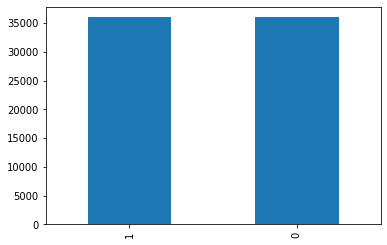

In [21]:
train['label'].value_counts().plot(kind = 'bar')

In [22]:
print(train.groupby('label').size().reset_index(name = 'count'))

   label  count
0      0  36000
1      1  36000


In [32]:
train.to_csv('train.txt', sep='\t')
test.to_csv('test.txt', sep='\t')

In [4]:
import pandas as pd
import torch
from torch.nn import functional as F
from torch.utils.data import DataLoader, Dataset
from transformers import AutoTokenizer, ElectraForSequenceClassification, AdamW
from tqdm.notebook import tqdm

In [5]:
# GPU 사용
device = torch.device("cuda")

# Dataset 만들어서 불러오기 

In [33]:
class NSMCDataset(Dataset):
  
  def __init__(self, csv_file):
    # 일부 값중에 NaN이 있을 경우 삭제.
    self.dataset = pd.read_csv(csv_file, sep='\t').dropna(axis=0) 
    # 중복제거
    self.dataset.drop_duplicates(subset=['comment'], inplace=True)
    self.tokenizer = AutoTokenizer.from_pretrained("monologg/koelectra-small-v3-discriminator")

    print(self.dataset.describe())
  
  def __len__(self):
    return len(self.dataset)
  
  def __getitem__(self, idx):
    row = self.dataset.iloc[idx, 1:3].values
    text = row[0]
    y = row[1]

    inputs = self.tokenizer(
        text, 
        return_tensors='pt',
        truncation=True,
        max_length=256,
        pad_to_max_length=True,
        add_special_tokens=True
        )
    
    input_ids = inputs['input_ids'][0]
    attention_mask = inputs['attention_mask'][0]

    return input_ids, attention_mask, y

In [35]:
train_dataset = NSMCDataset('train.txt')
test_dataset = NSMCDataset('test.txt')

         Unnamed: 0         label
count  72000.000000  72000.000000
mean   35999.500000      0.500000
std    20784.754028      0.500003
min        0.000000      0.000000
25%    17999.750000      0.000000
50%    35999.500000      0.500000
75%    53999.250000      1.000000
max    71999.000000      1.000000
         Unnamed: 0         label
count  18000.000000  18000.000000
mean    8999.500000      0.500000
std     5196.296758      0.500014
min        0.000000      0.000000
25%     4499.750000      0.000000
50%     8999.500000      0.500000
75%    13499.250000      1.000000
max    17999.000000      1.000000


# Create Model

In [36]:
model = ElectraForSequenceClassification.from_pretrained("monologg/koelectra-base-v3-discriminator").to(device)

# 한번 실행해보기
# text, attention_mask, y = train_dataset[0]
# model(text.unsqueeze(0).to(device), attention_mask=attention_mask.unsqueeze(0).to(device))

Downloading:   0%|          | 0.00/467 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/431M [00:00<?, ?B/s]

Some weights of the model checkpoint at monologg/koelectra-base-v3-discriminator were not used when initializing ElectraForSequenceClassification: ['discriminator_predictions.dense.weight', 'discriminator_predictions.dense.bias', 'discriminator_predictions.dense_prediction.weight', 'discriminator_predictions.dense_prediction.bias']
- This IS expected if you are initializing ElectraForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ElectraForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at monologg/koelectra-base-v3-discriminator and are newly initialized: 

In [ ]:
#@title
model.load_state_dict(torch.load("model.pt"))

In [37]:
# 모델 레이어 보기
model

ElectraForSequenceClassification(
  (electra): ElectraModel(
    (embeddings): ElectraEmbeddings(
      (word_embeddings): Embedding(35000, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): ElectraEncoder(
      (layer): ModuleList(
        (0): ElectraLayer(
          (attention): ElectraAttention(
            (self): ElectraSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): ElectraSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm

# Learn

In [38]:
epochs = 5
batch_size = 16

In [39]:
optimizer = AdamW(model.parameters(), lr=5e-6)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=True)

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:310: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


In [ ]:
losses = []
accuracies = []

for i in range(epochs):
  total_loss = 0.0
  correct = 0
  total = 0
  batches = 0

  model.train()

  for input_ids_batch, attention_masks_batch, y_batch in tqdm(train_loader):
    optimizer.zero_grad()
    y_batch = y_batch.to(device)
    y_pred = model(input_ids_batch.to(device), attention_mask=attention_masks_batch.to(device))[0]
    loss = F.cross_entropy(y_pred, y_batch)
    loss.backward()
    optimizer.step()

    total_loss += loss.item()

    _, predicted = torch.max(y_pred, 1)
    correct += (predicted == y_batch).sum()
    total += len(y_batch)

    batches += 1
    if batches % 100 == 0:
      print("Batch Loss:", total_loss, "Accuracy:", correct.float() / total)
  
  losses.append(total_loss)
  accuracies.append(correct.float() / total)
  print("Train Loss:", total_loss, "Accuracy:", correct.float() / total)

  0%|          | 0/4500 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2307: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


Batch Loss: 69.00622951984406 Accuracy: tensor(0.5331, device='cuda:0')
Batch Loss: 136.9005247950554 Accuracy: tensor(0.5572, device='cuda:0')
Batch Loss: 202.9380779862404 Accuracy: tensor(0.5752, device='cuda:0')


In [ ]:
losses, accuracies

테스트 데이터셋 정확도 확인하기

In [ ]:
model.eval()

test_correct = 0
test_total = 0

for input_ids_batch, attention_masks_batch, y_batch in tqdm(test_loader):
  y_batch = y_batch.to(device)
  y_pred = model(input_ids_batch.to(device), attention_mask=attention_masks_batch.to(device))[0]
  _, predicted = torch.max(y_pred, 1)
  test_correct += (predicted == y_batch).sum()
  test_total += len(y_batch)

print("Accuracy:", test_correct.float() / test_total)

In [ ]:
# 모델 저장하기
torch.save(model.state_dict(), "model.pt")